In [4]:
import os
import collections
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pprint import pprint
from customer_behaviour.tools import dgm as dgm

20


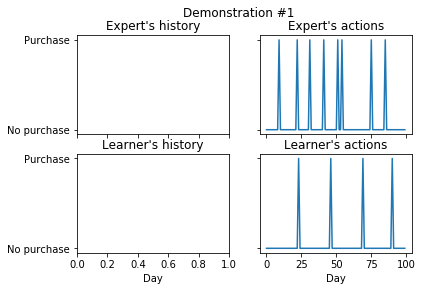

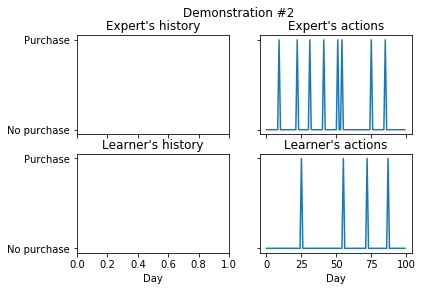

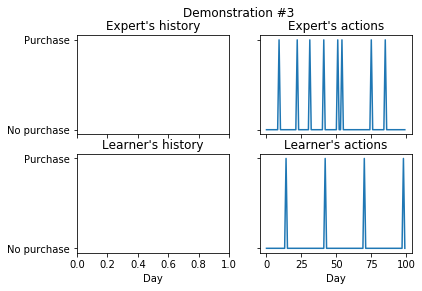

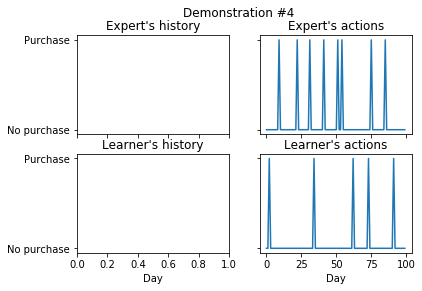

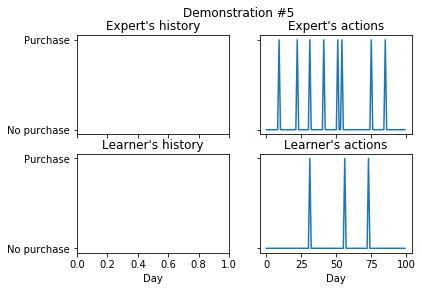

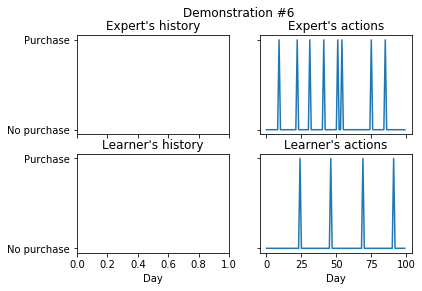

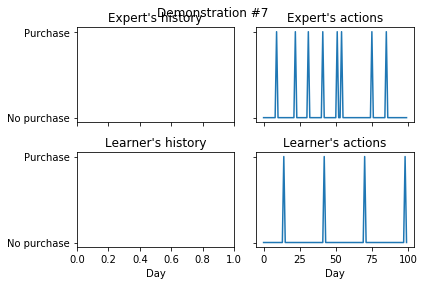

In [27]:
path = '/results/gail/discrete_events/1_expert(s)/case_3/'
datetime = '2020-02-15_15-03-16'

expert_data = os.getcwd() + path + datetime + '/expert_trajectories.npz'
learner_data = os.getcwd() + path + datetime + '/trajectories.npz'

result = Case3(expert_data, learner_data)
result.plot_trajectories(7)

In [20]:
# Cases

class Case1(Result):
    # There is only one expert
    # State representation: [sex, age, historical purchases]
    
    def __init__(self, expert_data, learner_data):
        Result.__init__(self, expert_data, learner_data) 
        
        # assert self.expert_states.shape[0] == 1
        
        self.n_learner_trajectories, self.episode_length, _ = self.learner_states.shape
        self.n_historical_events = self.learner_states.shape[2] - 2
    
    def plot_trajectories(self, n_trajectories=None):
        expert_states = self.expert_states[0]
        expert_actions = self.expert_actions[0]
        expert_sex = expert_states[0][0]
        expert_age = expert_states[0][1]
        expert_history = expert_states[0][2:]
        
        if n_trajectories is None: n_trajectories = self.n_learner_trajectories
        
        for i in range(n_trajectories):
            states = self.learner_states[i]
            actions = self.learner_actions[i]
            sex = states[0][0]
            age = states[0][1]
            history = states[0][2:]
            
            expert_sex_str = 'female' if expert_sex == 1 else 'male'
            sex_str = 'female' if sex == 1 else 'male'
            text = 'Expert: {}, {} years old | Learner: {}, {} years old'.format(
                expert_sex_str, get_age(expert_age), sex_str, get_age(age))
                
            fig = self.plot(expert_history, expert_actions, history, actions)  
            fig.suptitle('Demonstration #{}'.format(i+1))
            fig.text(0.5, 0, text, horizontalalignment='center', verticalalignment='center')
                         
        fig.tight_layout()
        plt.show()

        
class Case2(Result):
    # There is only one expert
    # State representation: [historical purchases]
    
    def __init__(self, expert_data, learner_data):
        Result.__init__(self, expert_data, learner_data) 
        
        self.n_learner_trajectories, self.episode_length, _ = self.learner_states.shape
        self.n_historical_events = self.learner_states.shape[2]
    
    def plot_trajectories(self, n_trajectories=None):
        expert_states = self.expert_states[0]
        expert_actions = self.expert_actions[0]
        expert_history = expert_states[0][:]
        
        if n_trajectories is None: n_trajectories = self.n_learner_trajectories
        
        for i in range(n_trajectories):
            states = self.learner_states[i]
            actions = self.learner_actions[i]
            history = states[0][:]
                
            fig = self.plot(expert_history, expert_actions, history, actions)  
            fig.suptitle('Demonstration #{}'.format(i+1))
                         
        fig.tight_layout()
        plt.show()

        
class Case3(Result):
    # There is only one expert
    # State representation: [days elapsed since last purchase, 
    #                        days elapsed between last purchase and the purchase before that, ...]
    
    def __init__(self, expert_data, learner_data):
        Result.__init__(self, expert_data, learner_data)
        
        self.n_expert_trajectories = self.expert_states.shape[0]
        
        print(self.expert_states.shape[2])
        
        self.n_learner_trajectories, self.episode_length, _ = self.learner_states.shape
        self.n_historical_events = self.learner_states.shape[2]
        
    def plot_trajectories(self, n_trajectories=None):
        expert_states = self.expert_states[0]
        expert_actions = self.expert_actions[0]
        expert_history = expert_states[0][:]

        if n_trajectories is None: n_trajectories = self.n_learner_trajectories

        for i in range(n_trajectories):
            states = self.learner_states[i]
            actions = self.learner_actions[i]
            history = states[0][:]

            fig = self.plot(expert_history, expert_actions, history, actions)  
            fig.suptitle('Demonstration #{}'.format(i+1))

        fig.tight_layout()
        plt.show()
        
    def plot(self, expert_history, expert_actions, learner_history, learner_actions):        
        fig, axes = plt.subplots(2, 2, sharex='col', sharey='row')

        ax11 = axes[0, 0]
        ax12 = axes[0, 1]
        ax21 = axes[1, 0]
        ax22 = axes[1, 1]

        # ax11.plot(expert_history)
        ax12.plot(expert_actions)
        # ax21.plot(learner_history)
        ax22.plot(learner_actions)

        # Set titles
        ax11.set_title("Expert's history")
        ax12.set_title("Expert's actions")
        ax21.set_title("Learner's history")
        ax22.set_title("Learner's actions")

        # Set x-labels
        ax21.set_xlabel('Day')
        ax22.set_xlabel('Day')

        # Set y-labels
        ax11.set_yticks([0, 1])
        ax11.set_yticklabels(['No purchase', 'Purchase'])
        ax21.set_yticks([0, 1])
        ax21.set_yticklabels(['No purchase', 'Purchase'])

        return fig
 

In [6]:
def get_age(age):
    if age < 0.2:
        return '18-29'
    elif age < 0.4:
        return '30-39'
    elif age < 0.6:
        return '40-49'
    elif age < 0.8:
        return '50-59'
    elif age < 1.0:
        return '60-69'
    else:
        return '70-80'
    
class Result():
    def __init__(self, expert_data, learner_data):
        self.expert_states, self.expert_actions = self.load_data(expert_data)
        self.learner_states, self.learner_actions = self.load_data(learner_data)
    
    def load_data(self, file):
        data = np.load(file, allow_pickle=True)
        assert sorted(data.files) == sorted(['states', 'actions'])

        states = data['states']
        actions = data['actions']

        return states, actions
    
    def plot(self, expert_history, expert_actions, learner_history, learner_actions):        
        fig, axes = plt.subplots(2, 2, sharex='col', sharey='row')
        
        ax11 = axes[0, 0]
        ax12 = axes[0, 1]
        ax21 = axes[1, 0]
        ax22 = axes[1, 1]

        ax11.plot(expert_history)
        ax12.plot(expert_actions)
        ax21.plot(learner_history)
        ax22.plot(learner_actions)
        
        # Set titles
        ax11.set_title("Expert's history")
        ax12.set_title("Expert's actions")
        ax21.set_title("Learner's history")
        ax22.set_title("Learner's actions")
        
        # Set x-labels
        ax21.set_xlabel('Day')
        ax22.set_xlabel('Day')
        
        # Set y-labels
        ax11.set_yticks([0, 1])
        ax11.set_yticklabels(['No purchase', 'Purchase'])
        ax21.set_yticks([0, 1])
        ax21.set_yticklabels(['No purchase', 'Purchase'])
        
        return fig


In [ ]:
%matplotlib inline

model = dgm.DGM()

# sample = model.sample_deterministically(200)

model.spawn_new_customer(0)
sample = model.sample(200)

_, ax = plt.subplots()
ax.plot(sample[0, :])
